In [1]:

# this is a data set which contain several features , & we need to apply classification model , to be able to detect if the person exited or not
# 
# here is the data : 
# 
# https://www.kaggle.com/mrtechnical011/classification-dataset


In [2]:
# so let's start importing needed libraries

# In[1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


In [3]:

# # Reading Data
# 
# then read the data file


data = pd.read_csv('Churn_Modelling.csv')
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# what is the dimension 

data.shape



(10000, 14)

In [5]:
# _____
# 
# great , what is the type of values , & is there any nulls ? 

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# ____
# 
# looks clean data , also alkl features even numerical or categorical , so we don't have a mized data which need conversion 
# 
# ok , how about the details of it ? 


data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# # Unique Values 
# 
# ok we can notice that row number is just a series of number , so it'll not be helpful for training , so we'll drop it later 
# 
# also we can notice a binary values (just ones & zeros) at HasCrCard , IsActiveMember , and ofcourse the output Exited
# 
# we need to look to the unique values of each feature , and this can be easily done here 

# In[6]:


for column in data.columns : 
    print(f'Number of unique data for {column} is {len(data[column].unique())}')
    print(f'unique data for {column} is {data[column].unique()}')
    print('=====================================')
    

Number of unique data for RowNumber is 10000
unique data for RowNumber is [    1     2     3 ...  9998  9999 10000]
Number of unique data for CustomerId is 10000
unique data for CustomerId is [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Number of unique data for Surname is 2932
unique data for Surname is ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Number of unique data for CreditScore is 460
unique data for CreditScore is [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 80

In [8]:
# so it's clear that we'll not use ('RowNumber', 'CustomerId', 'Surname') , since they will help us with nothing in trainging the model , let's drop them 

data.drop(['RowNumber', 'CustomerId', 'Surname' ], axis=1, inplace=True)


In [9]:
# now how data looks like ? 


data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# we need to have another look to the unique values of features 

# In[9]:


for column in data.columns : 
    print(f'Number of unique data for {column} is {len(data[column].unique())}')
    print(f'unique data for {column} is {data[column].unique()}')
    print('=====================================')


Number of unique data for CreditScore is 460
unique data for CreditScore is [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737

In [11]:
# # Needed Functions
# 
# so before we handle the dummies values for categrocial features , let's first build an important functions that we'll need , to know the relationship & the correlations between features & each other
# 
# _____
# 
# first a function to make pie chart depend on the the value counts & their index


def make_pie(feature) : 
    plt.pie(data[feature].value_counts(),labels=list(data[feature].value_counts().index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(data[feature].value_counts()))] )
    plt.show()



In [12]:
# then a function for making countplot using seaborn


def make_countplot(feature) :
    sns.countplot(x=feature, data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("prism", 3)) 


In [13]:
# another one for kdeplot also using seaborn

def make_kdeplot(feature) : 
    sns.kdeplot(data[feature], shade=True)


In [14]:
# also we'll need this function to divide some features into few segmentations

def divide_feature(feature,n):
    return round((data[feature]- data[feature].min())/n)


In [15]:
# also for making dummies for categorical features , using LabelEncoder from sklearn


def make_label_encoder(original_feature , new_feature) : 
    enc  = LabelEncoder()
    enc.fit(data[original_feature])
    data[new_feature] = enc.transform(data[original_feature])
    data.drop([original_feature],axis=1, inplace=True)


In [16]:
# also , we'll need to make standardization for each feature here


def make_standardization(feature) : 
    data[feature] =  (data[feature] - data[feature].mean()) / (data[feature].max() - data[feature].min())



In [17]:
# and at last to make a classification report using its class from sklearn

def make_report() : 
    print(classification_report(y_test,y_pred))
    print('************************************')
    CM = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix is : \n', CM)
    print('************************************')
    sns.heatmap(CM, center = True)
    plt.show()


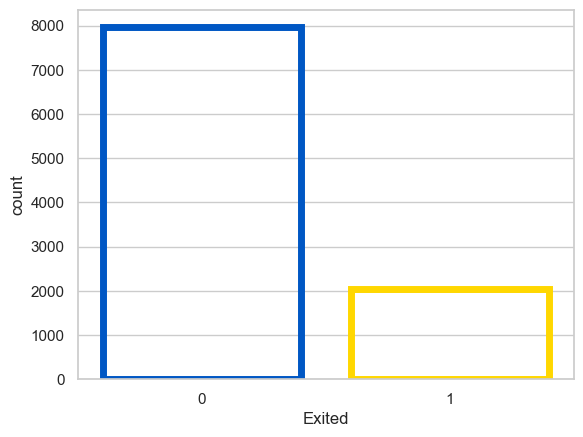

In [18]:
# 
# # Data Correlations
# 
# now let's use these functions . to show everything we need in features 
# 
# let's start with countplotting the output , to know how many people are exited & how many are not

# In[17]:


make_countplot("Exited")



In [19]:
# ____

# ok , about 20 % , which is enough data for training both types
# 
# now when we move to the creditscore features , how many unique values it contain ? 

#
len(data['CreditScore'].unique())

460

In [20]:
# it's a big a mount which will not enable us to plot it easily , since it's numerical values so we can use them in training , but we need to divide it now into segmentaion to have a look to it , let's use this function 


data['temp'] = divide_feature('CreditScore',100)


In [21]:
# let's see it in the data


data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,temp
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,3.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,3.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5.0


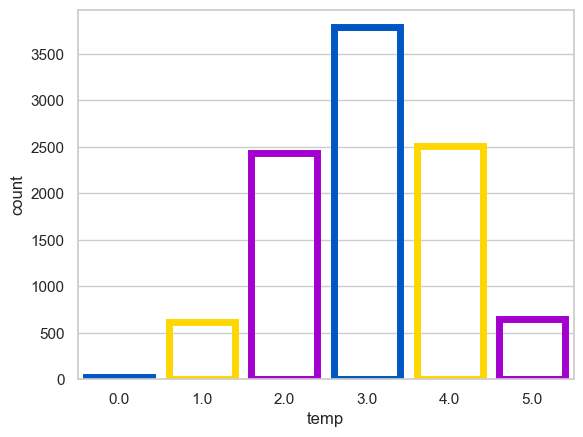

In [22]:
# now we can know the countplot for each segmentation

make_countplot('temp')


In [23]:
# ok , majority of them in 2nd , 3rd & 4th segmentaion , now we can drop it since we'll not use it in training

data.drop(["temp" ], axis=1, inplace=True)


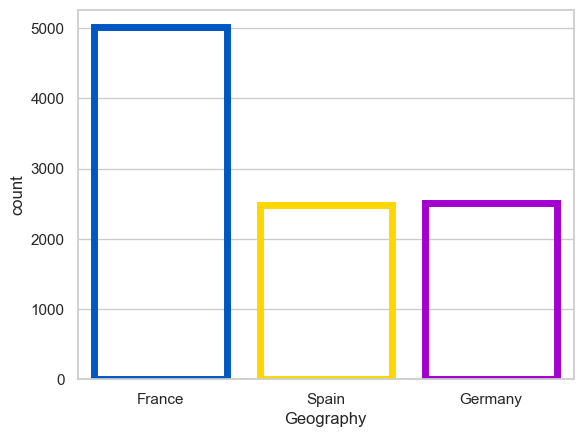

In [24]:
# how about the original country , let's have a look at it


make_countplot("Geography")


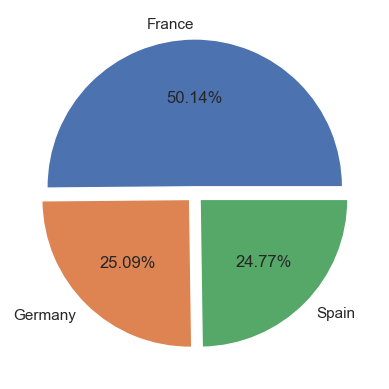

In [25]:
# almost 50% of people are from france & the rest are equally divided between spain & germany  , ok will pie chart graph whelp us in something ? 

make_pie('Geography')

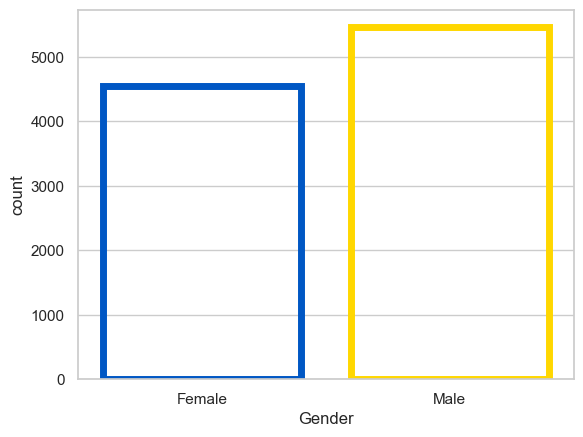

In [26]:
# ok it gave us the same idea 
# 
# _____
# 
# how about the Gender distribution ? 


make_countplot("Gender")


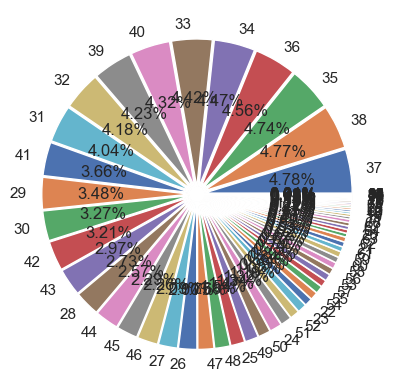

In [27]:
# not exactly equally divided but they are pretty close to each other 
# 
# ____
# 
# 
# now let's have a look to the Age distribution 

make_pie("Age")


In [28]:
# Oh , since the age unique values are so much , so we'll need to divide them into segmentaions  

data['temp'] = divide_feature('Age',10)


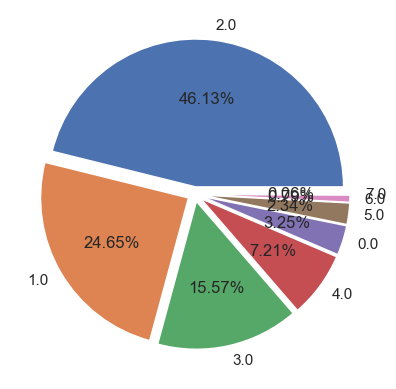

In [29]:
# now we can make the pie again


make_pie('temp')


C:\Users\NTC\AppData\Local\Temp\ipykernel_11812\678742883.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


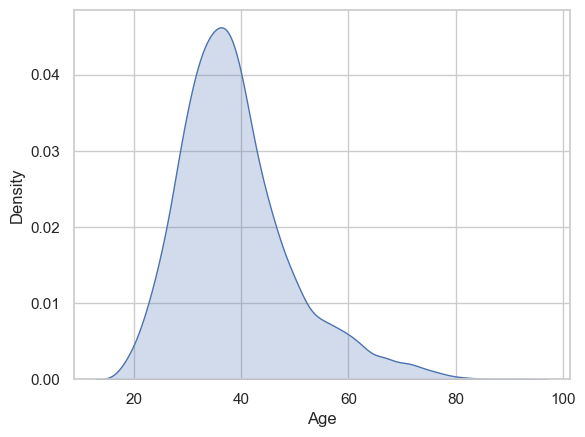

In [30]:
# which refer to us that almost 75% of people are from first 2 segmentaions , ok how about kdeplot , for the Age feature itself 


make_kdeplot('Age')


In [31]:
# almost same result , majority of people from 30 to 50 , ok , let's drop the temp feature

data.drop(["temp" ], axis=1, inplace=True)


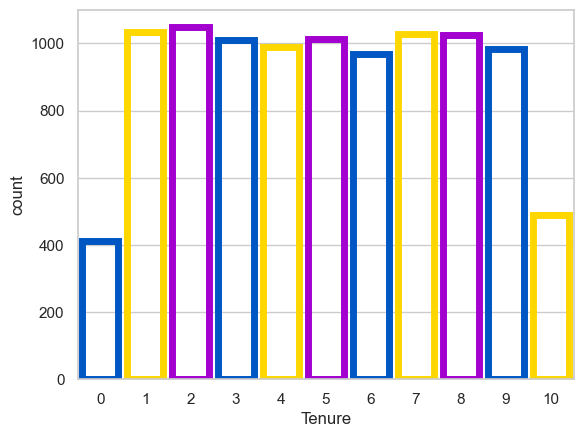

In [32]:
# now we can have a look to Tenure feature

make_countplot("Tenure")

C:\Users\NTC\AppData\Local\Temp\ipykernel_11812\678742883.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


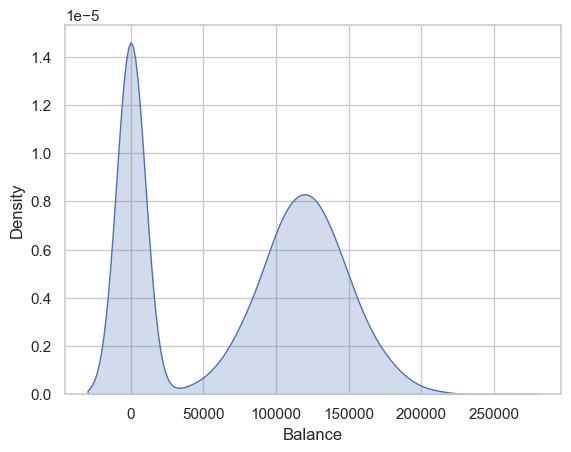

In [33]:
# almost equally distributed  . . 
# 
# how about balane , let's graph it

make_kdeplot('Balance')

In [34]:
# majority of people either have zero balance , or between 10 & 15 thousand . 
# 
# to have an accurate look , let's divide it 

data['temp'] = divide_feature('Balance',10000)
print('Number of Sectors are {}'.format(len(data['temp'].unique())))

Number of Sectors are 25


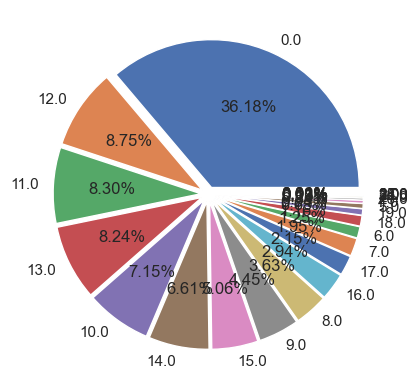

In [35]:
# 25 segmentations are fine , now let's make pie chart about it 

make_pie('temp')


In [36]:
# kinda more clear , ok drop it 

data.drop(["temp" ], axis=1, inplace=True)


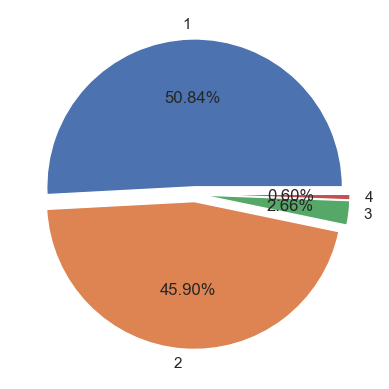

In [37]:
# ow about Nomber of Products ? 

make_pie('NumOfProducts')

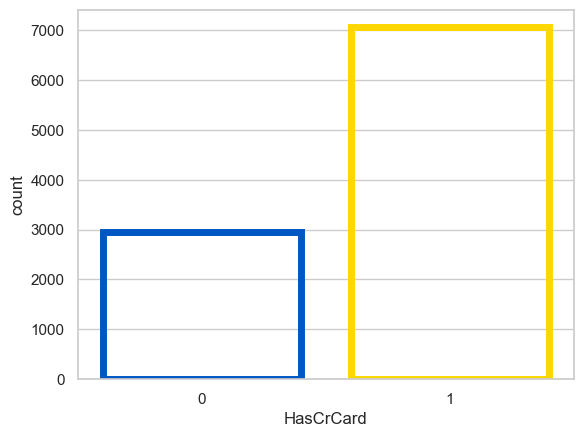

In [38]:
# majority of it either 1 or 2 , so this data will affect in a bad way finding any product number 3 or 4 , but there is nothing to do here
# 
# ___
# 
# ok, how about either he had a card or not

make_countplot('HasCrCard')


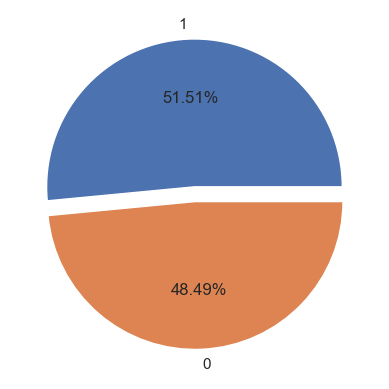

In [39]:
# great . now if he is an active member or now

make_pie('IsActiveMember')


In [40]:
# almost equl numbers 
# 
# ___
# 
# 
# how about the estimated salary , let's know its unique values

len(data['EstimatedSalary'].unique())


9999

In [41]:
# since it's a big amount of unique values , we have to divide it

data['temp'] = divide_feature('EstimatedSalary',10000)
print('Number of Sectors are {}'.format(len(data['temp'].unique())))


Number of Sectors are 21


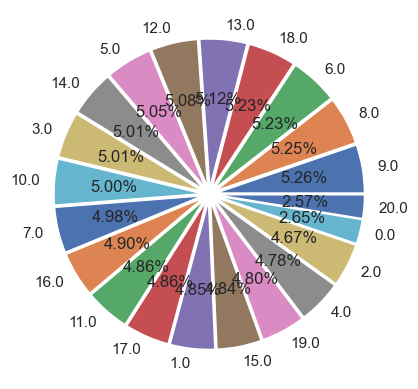

In [42]:
# ok , now we can plot it easily 


make_pie('temp')


C:\Users\NTC\AppData\Local\Temp\ipykernel_11812\678742883.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


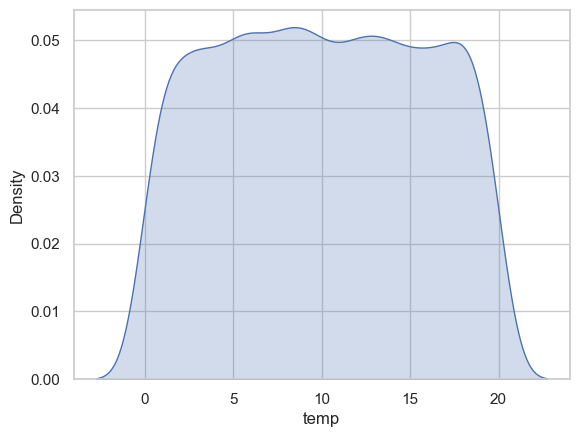

In [43]:
# kinda equally distributed , let's have a look to the kdeplot


make_kdeplot('temp')


In [44]:
# now let's drop it 


data.drop(["temp"], axis=1, inplace=True)

In [45]:
# ok , we now finished data processing , so we can move to get dummies step
# 
# _____
# 
# 
# # Get Dummies
# 
# first let's now what categorical features needed to convert it 

data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:

# both features Geography & Gender  , so let's convert both of them into new features & frop the original features 

make_label_encoder('Geography' , 'Geography Code')

In [47]:
# let's have a look

data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography Code
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,2
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,2


In [48]:
# now the gender

make_label_encoder('Gender' , 'Gender Code')
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography Code,Gender Code
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


In [49]:
# # Data Standardization
# 
# ok , lets use the defined function above , to startdardize all features , except the output

# In[48]:


for column in data.columns  : 
    if not column  =='Exited' :
        make_standardization(column)

In [50]:
# how it looks now ? 

data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography Code,Gender Code
0,-0.063058,0.041597,-0.30128,-0.304848,-0.176733,0.2945,0.4849,0.006294,1,-0.37315,-0.5457
1,-0.085058,0.028084,-0.40128,0.029183,-0.176733,-0.7055,0.4849,0.062268,0,0.62685,-0.5457
2,-0.297058,0.041597,0.29872,0.331509,0.489933,0.2945,-0.5151,0.069213,1,-0.37315,-0.5457
3,0.096942,0.001057,-0.40128,-0.304848,0.156600,-0.7055,-0.5151,-0.031321,0,-0.37315,-0.5457
4,0.398942,0.055111,-0.30128,0.195398,-0.176733,0.2945,0.4849,-0.105041,0,0.62685,-0.5457


In [51]:

# # Data Splitting
# 
# now we are ready to define X , y data

X = data.drop(['Exited'], axis=1, inplace=False)
y = data['Exited']


In [52]:
# now split it using sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)


X_train shape is  (6700, 10)
X_test shape is  (3300, 10)
y_train shape is  (6700,)
y_test shape is  (3300,)


In [53]:
# # Building the Model
# 
# there are several classifier models , let's start with LogisticRegression


LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression(random_state=33, solver='sag')

In [54]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
print('----------------------------------------------------')

LogisticRegressionModel Train Score is :  0.8102985074626866
LogisticRegressionModel Test Score is :  0.8033333333333333
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [29]
----------------------------------------------------


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2626
           1       0.57      0.16      0.25       674

    accuracy                           0.80      3300
   macro avg       0.69      0.56      0.57      3300
weighted avg       0.77      0.80      0.76      3300

************************************
Confusion Matrix is : 
 [[2543   83]
 [ 566  108]]
************************************


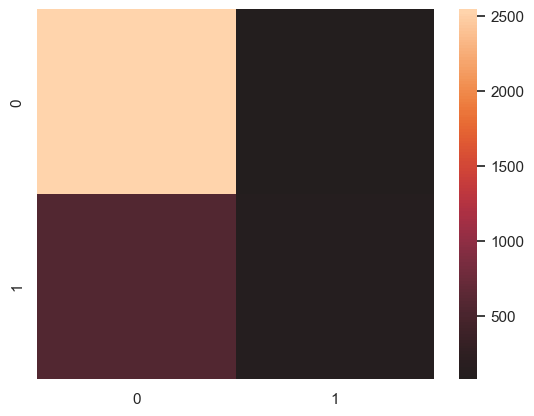

In [55]:
# not very good accuracy , let's see classification report for it

y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
make_report()


In [56]:
# how about Gaussian NB , will it helps ? 

GaussianNBModel = GaussianNB()
GaussianNBModel.fit(X_train, y_train)

print('GaussianNBModel Train Score is : ' , GaussianNBModel.score(X_train, y_train))
print('GaussianNBModel Test Score is : ' , GaussianNBModel.score(X_test, y_test))


GaussianNBModel Train Score is :  0.8283582089552238
GaussianNBModel Test Score is :  0.8242424242424242


              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2626
           1       0.72      0.23      0.35       674

    accuracy                           0.82      3300
   macro avg       0.77      0.60      0.62      3300
weighted avg       0.81      0.82      0.79      3300

************************************
Confusion Matrix is : 
 [[2564   62]
 [ 518  156]]
************************************


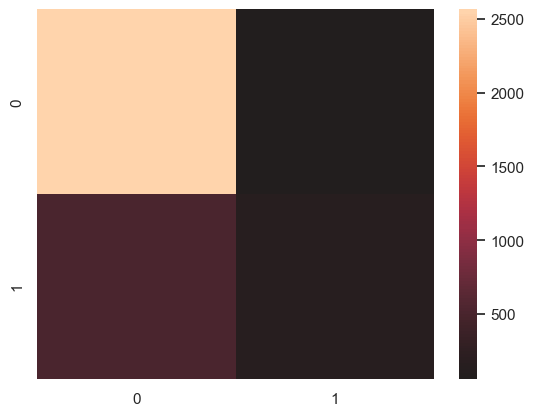

In [57]:
# a little better , but we might catch something best

y_pred = GaussianNBModel.predict(X_test)
y_pred_prob = GaussianNBModel.predict_proba(X_test)
make_report()


In [58]:
# how about Decision Tree ? 


DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(X_train, y_train)

print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)


DecisionTreeClassifierModel Train Score is :  0.8405970149253731
DecisionTreeClassifierModel Test Score is :  0.8384848484848485
DecisionTreeClassifierModel Classes are :  [0 1]
DecisionTreeClassifierModel feature importances are :  [0.         0.52092049 0.         0.02097101 0.27868453 0.
 0.17942397 0.         0.         0.        ]


              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2626
           1       0.88      0.24      0.38       674

    accuracy                           0.84      3300
   macro avg       0.86      0.62      0.64      3300
weighted avg       0.84      0.84      0.80      3300

************************************
Confusion Matrix is : 
 [[2603   23]
 [ 510  164]]
************************************


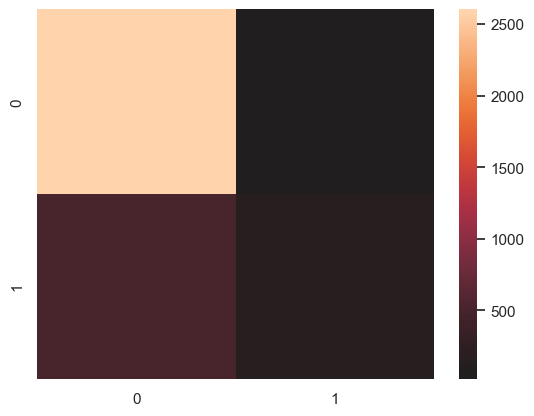

In [59]:
# a slightly better

# In[58]:


y_pred = DecisionTreeClassifierModel.predict(X_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(X_test)

make_report()

In [60]:
# now let's check SVC


SVCModel = SVC(kernel= 'sigmoid',# it can be also linear,poly,sigmoid,precomputed
               max_iter=1000,C=0.5,gamma='auto')
SVCModel.fit(X_train, y_train)

print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))


C:\Users\NTC\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVCModel Train Score is :  0.4337313432835821
SVCModel Test Score is :  0.4296969696969697


In [61]:
# oh , very far from calling it suitable , how about Random Forest ? 

RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=1000,max_depth=2,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)


RandomForestClassifierModel Train Score is :  0.8125373134328359
RandomForestClassifierModel Test Score is :  0.8081818181818182
RandomForestClassifierModel features importances are :  [1.41053968e-02 4.14482946e-01 3.86692255e-04 7.01571048e-02
 3.23818178e-01 1.39429212e-04 1.12940292e-01 1.99785774e-03
 2.79182810e-02 3.40538218e-02]


In [62]:
# how about Gradient Boosting Classifier, will it be better ? 



GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=5,random_state=33) 
GBCModel.fit(X_train, y_train)

#Calculating Details
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))


GBCModel Train Score is :  0.9028358208955224
GBCModel Test Score is :  0.8627272727272727


In [63]:
# Ok , better accuracy so we can focus in the model , let's check the 


y_pred = GBCModel.predict(X_test)
y_pred_prob = GBCModel.predict_proba(X_test)

print('Predicted Value for GBCModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for GBCModel is : ' , y_pred_prob[:10])

Predicted Value for GBCModel is :  [0 0 1 0 0 0 0 0 1 0]
Prediction Probabilities Value for GBCModel is :  [[0.93773831 0.06226169]
 [0.70985056 0.29014944]
 [0.37445643 0.62554357]
 [0.96764178 0.03235822]
 [0.91805135 0.08194865]
 [0.93083061 0.06916939]
 [0.95482623 0.04517377]
 [0.50292891 0.49707109]
 [0.05055561 0.94944439]
 [0.955743   0.044257  ]]


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2626
           1       0.74      0.50      0.60       674

    accuracy                           0.86      3300
   macro avg       0.81      0.73      0.76      3300
weighted avg       0.85      0.86      0.85      3300

************************************
Confusion Matrix is : 
 [[2510  116]
 [ 337  337]]
************************************


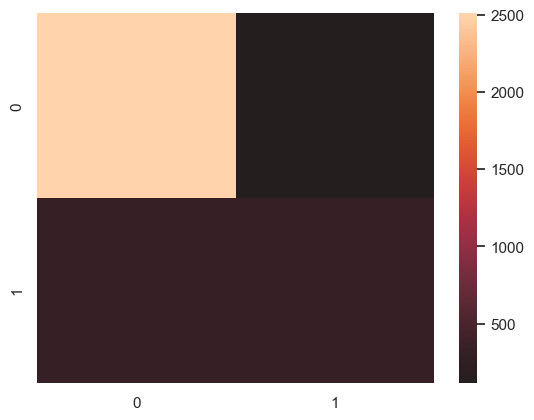

In [64]:
make_report()


In [65]:
# # Using GridSearch
# 
# since we see the GBClassifier is the most suitable model , let's use GridSearch tool to look for the best parameters for it




SelectedModel = GradientBoostingClassifier()
SelectedParameters = {'loss':('deviance', 'exponential'), 'max_depth':[1,2,3,4,5] , 'n_estimators':[50,75,100]}

GridSearchModel = GridSearchCV(SelectedModel,SelectedParameters,cv = 5,return_train_score=True)
GridSearchModel.fit(X_train, y_train)
sorted(GridSearchModel.cv_results_.keys())
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]




C:\Users\NTC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NTC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NTC\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\NTC\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\NTC\anaconda3\Lib\site-packages\sklearn\u

In [66]:
# Ok , how about the accuracy ? 

print('All Results are :\n', GridSearchResults )
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)


All Results are :
     mean_test_score  std_test_score  \
0               NaN             NaN   
1               NaN             NaN   
2               NaN             NaN   
3               NaN             NaN   
4               NaN             NaN   
5               NaN             NaN   
6               NaN             NaN   
7               NaN             NaN   
8               NaN             NaN   
9               NaN             NaN   
10              NaN             NaN   
11              NaN             NaN   
12              NaN             NaN   
13              NaN             NaN   
14              NaN             NaN   
15         0.820149        0.005319   
16         0.844328        0.005476   
17         0.847910        0.006461   
18         0.855672        0.006290   
19         0.858060        0.006614   
20         0.859552        0.006846   
21         0.858657        0.005695   
22         0.861045        0.007469   
23         0.861343        0.005940   
24    

In [67]:
# ok better accuracy , let's use the best model to fit & predict the data


GBCModel = GridSearchModel.best_estimator_
GBCModel.fit(X_train, y_train)



GradientBoostingClassifier(loss='exponential')

In [68]:
# how about the score ? 

print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))
print('GBCModel features importances are : ' , GBCModel.feature_importances_)



GBCModel Train Score is :  0.8695522388059701
GBCModel Test Score is :  0.8615151515151516
GBCModel features importances are :  [0.02678557 0.39171057 0.00379812 0.09103037 0.28559555 0.00145609
 0.1157268  0.03620957 0.02847528 0.01921206]


In [69]:
# now let's use it to predict the test value


y_pred = GBCModel.predict(X_test)
y_pred_prob = GBCModel.predict_proba(X_test)

print('Predicted Value for GBCModel is : ' , y_pred)
print('Prediction Probabilities Value for GBCModel is : ' , y_pred_prob)


Predicted Value for GBCModel is :  [0 0 1 ... 0 0 0]
Prediction Probabilities Value for GBCModel is :  [[0.95347933 0.04652067]
 [0.66758427 0.33241573]
 [0.45230912 0.54769088]
 ...
 [0.87374173 0.12625827]
 [0.85624708 0.14375292]
 [0.87585058 0.12414942]]


In [70]:
# no we can insert the predicted value to X_test


X_test.insert(10,'Predicted Valued',y_pred)



In [71]:
# & see the final Result



X_test.head(30)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography Code,Gender Code,Predicted Valued
3472,-0.113058,0.014570,0.39872,0.183067,0.156600,-0.7055,0.4849,0.454006,-0.37315,0.4543,0
5095,0.108942,0.095651,-0.00128,0.051332,-0.176733,-0.7055,0.4849,0.195378,0.62685,-0.5457,0
9504,-0.181058,0.068624,-0.00128,0.266080,-0.176733,0.2945,-0.5151,-0.007146,-0.37315,-0.5457,1
5786,-0.125058,0.014570,-0.00128,-0.304848,0.156600,-0.7055,-0.5151,0.003188,-0.37315,0.4543,0
8758,0.024942,-0.066511,0.49872,-0.304848,-0.176733,0.2945,0.4849,0.069974,-0.37315,0.4543,0
7207,-0.261058,-0.120565,-0.10128,0.273964,0.156600,-0.7055,-0.5151,0.225375,0.62685,-0.5457,0
1562,0.086942,-0.107051,0.09872,0.129801,0.156600,0.2945,0.4849,-0.403245,0.12685,0.4543,0
3578,0.106942,0.001057,-0.40128,0.191929,-0.176733,0.2945,-0.5151,0.082112,0.12685,-0.5457,0
2546,0.018942,0.149705,-0.40128,-0.304848,0.489933,0.2945,0.4849,0.458838,-0.37315,0.4543,1
6163,-0.325058,-0.147592,0.19872,0.250143,0.156600,0.2945,-0.5151,0.033549,0.12685,-0.5457,0
